# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [ ]:
#read the data

data_path = '/content/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
df.shape

(227, 20)

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- There are a few missing values we need to deal with          
2- The data type of many columns need to be handled          
3- We need to check for outliers          

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**Handle datatypes**

In [ ]:
cols = df_copy.select_dtypes('object').columns[2:]

In [ ]:
for col in cols:
  df_copy[col] = df_copy[col].str.replace(',', '').astype('float')

In [ ]:
df_copy.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

**Handle missing values**

In [ ]:
import missingno as msno

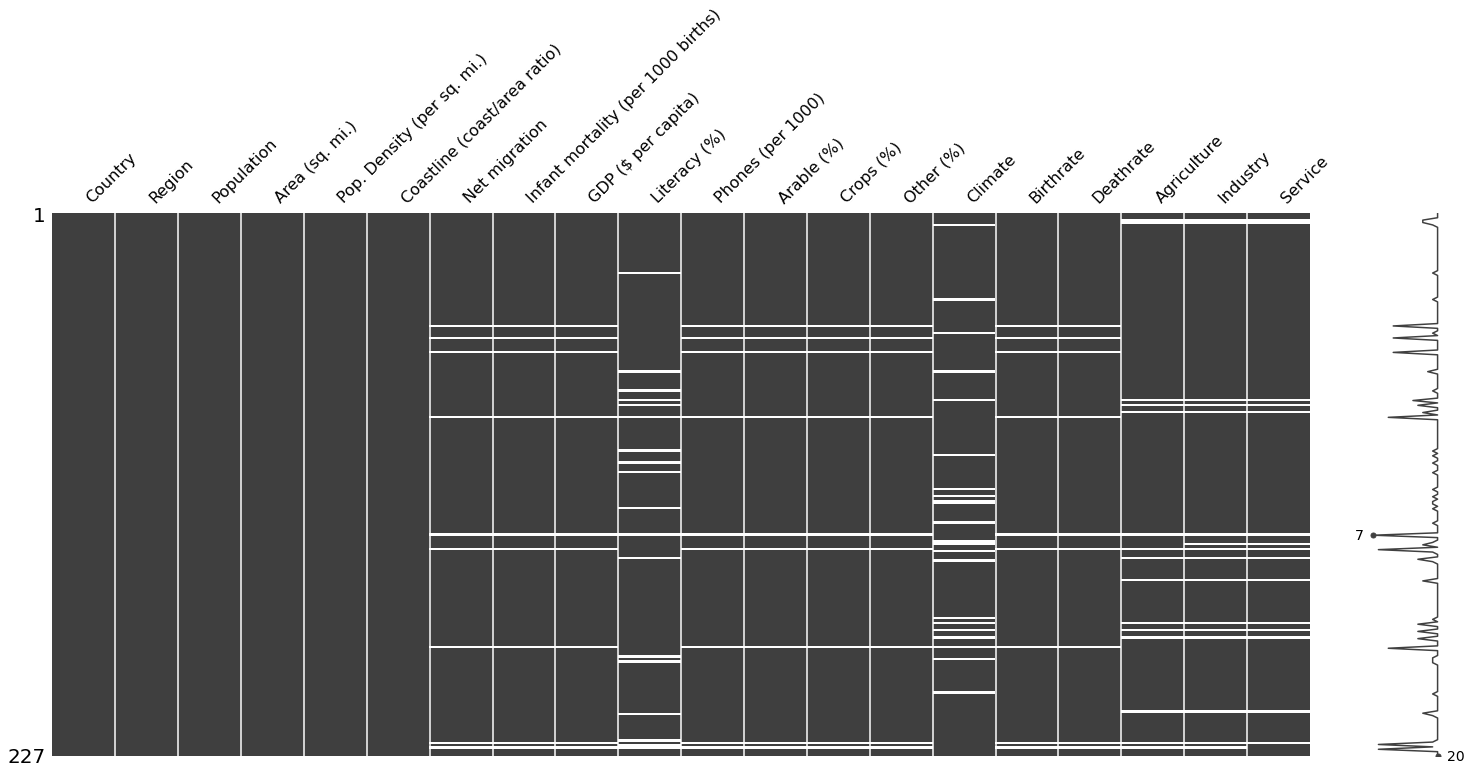

In [ ]:
msno.matrix(df_copy)

In [ ]:
cols = ['Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate']
df_copy.dropna(subset= cols, inplace = True)

In [ ]:
df_copy.shape

(218, 20)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
cols = df_copy.columns[2:]

In [ ]:
cols

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [ ]:
imputer = KNNImputer()
df_copy[cols] = imputer.fit_transform(df_copy[cols])

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             218 non-null    object 
 1   Region                              218 non-null    object 
 2   Population                          218 non-null    float64
 3   Area (sq. mi.)                      218 non-null    float64
 4   Pop. Density (per sq. mi.)          218 non-null    float64
 5   Coastline (coast/area ratio)        218 non-null    float64
 6   Net migration                       218 non-null    float64
 7   Infant mortality (per 1000 births)  218 non-null    float64
 8   GDP ($ per capita)                  218 non-null    float64
 9   Literacy (%)                        218 non-null    float64
 10  Phones (per 1000)                   218 non-null    float64
 11  Arable (%)                          218 non-n

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_copy.drop(columns='Country', inplace = True)

In [ ]:
df_copy['Region'] = encoder.fit_transform(df_copy['Region'])

In [ ]:
df_copy['Region'].unique()

array([ 0,  3,  6,  8, 10,  9,  4,  2,  5,  7,  1])

In [ ]:
df_copy.shape

(218, 19)

In [ ]:
df_copy.describe()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,218.000000,2.180000e+02,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,5.724771,2.987254e+07,6.211827e+05,3860.733945,2083.706422,8.004587,3212.495413,9785.779817,832.865138,2341.986239,1170.417431,418.399083,6840.935780,3.073394,2049.894495,826.087156,105.028440,215.839450,407.503670
std,3.377539,1.201747e+08,1.823293e+06,16930.189399,7358.773590,480.661847,3528.169799,10122.445270,192.190146,2263.446008,1277.403979,824.730897,3216.859806,3.656007,1225.678006,507.110489,124.916235,170.082706,259.079021
min,0.000000,7.026000e+03,2.000000e+00,0.000000,0.000000,-2099.000000,19.000000,500.000000,176.000000,2.000000,0.000000,0.000000,50.000000,1.000000,10.000000,22.000000,0.000000,1.000000,5.000000
25%,4.000000,4.774422e+05,6.995000e+03,284.000000,9.250000,-70.000000,645.750000,1900.000000,759.000000,364.500000,211.250000,9.500000,5629.250000,2.000000,1084.250000,522.250000,18.000000,39.500000,79.250000
50%,5.000000,5.335410e+06,9.234550e+04,774.000000,70.500000,0.000000,1832.000000,5800.000000,921.000000,1729.000000,697.000000,91.500000,8017.000000,2.000000,1802.000000,715.500000,55.000000,216.500000,451.400000
75%,9.000000,1.880989e+07,4.493230e+05,1909.750000,914.500000,81.500000,5113.500000,15700.000000,979.000000,3920.250000,1778.250000,409.250000,9293.750000,3.000000,2935.500000,1030.000000,147.750000,311.750000,611.000000
max,10.000000,1.313974e+09,1.707520e+07,162715.000000,87066.000000,2306.000000,19119.000000,55100.000000,1000.000000,10356.000000,6211.000000,5068.000000,9996.000000,25.000000,5073.000000,2974.000000,769.000000,906.000000,954.000000


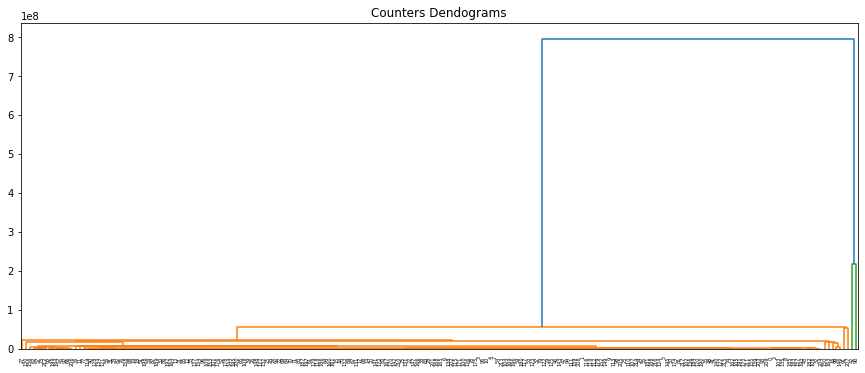

In [ ]:
plt.figure(figsize=(15, 6))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y = df_copy, method = 'single',metric= 'euclidean'), orientation='top')

It seems to be 3 clusters but the data need to be normalized

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
from sklearn import preprocessing

In [ ]:
std_scaler = preprocessing.StandardScaler()

In [ ]:
data_std = std_scaler.fit_transform(df_copy)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
  - Complete-Linkage Clustering
  - Single-Linkage Clustering
  - Average-Linkage Clustering
  - Centroid Linkage Clustering

2- Distance function:
  - Euclidean Distance 
  - Manhattan Distance 
  - Mahalanobis distance 

3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

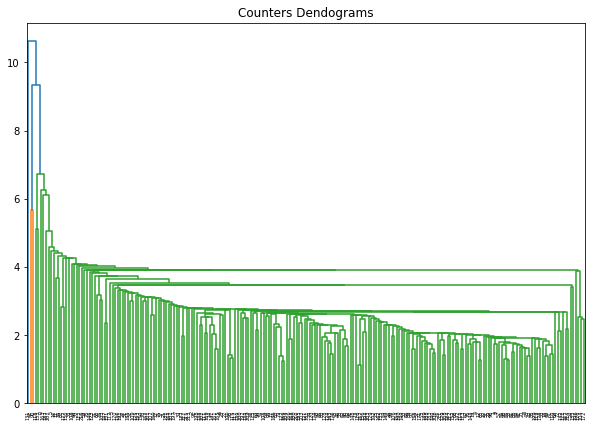

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=data_std , method = 'single',metric= 'euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering using ward's method
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(data_std)

# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
complete_pred = complete.fit_predict(data_std)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage = 'average')
avg_pred = avg.fit_predict(data_std)

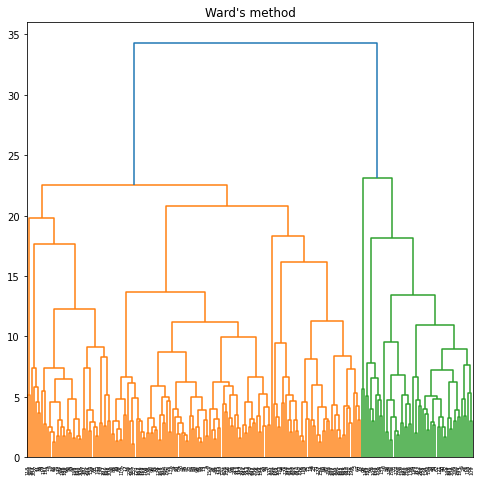

In [ ]:
plt.figure(figsize =(8, 8))
plt.title("Ward's method")
Dendrogram = shc.dendrogram((shc.linkage(data_std, method ='ward')))

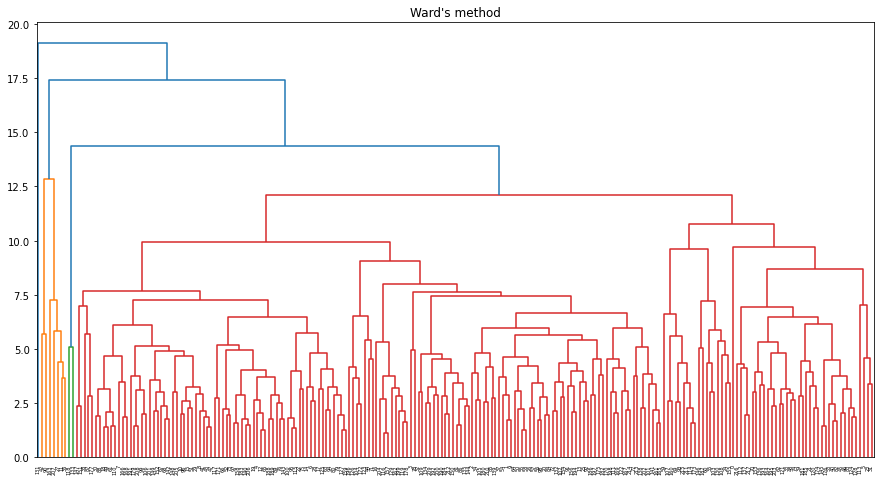

In [ ]:
plt.figure(figsize =(15, 8))
plt.title("Ward's method")
Dendrogram = shc.dendrogram((shc.linkage(data_std, method ='complete')))

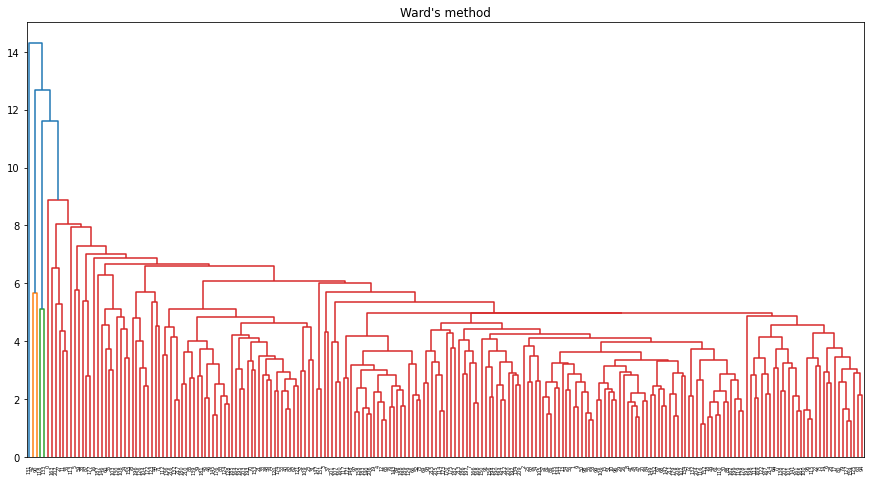

In [ ]:
plt.figure(figsize =(15, 8))
plt.title("Ward's method")
Dendrogram = shc.dendrogram((shc.linkage(data_std, method ='average')))

In [ ]:
from sklearn.metrics import silhouette_score

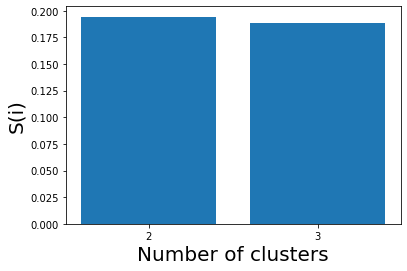

In [ ]:
k = [2, 3]
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
for i in range(len(k)):
  ward = AgglomerativeClustering(n_clusters= k[i])
  silhouette_scores.append(silhouette_score(data_std, ward.fit_predict(data_std)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)


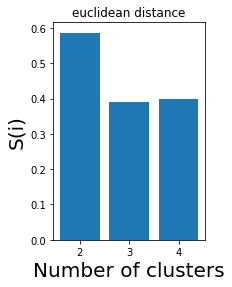

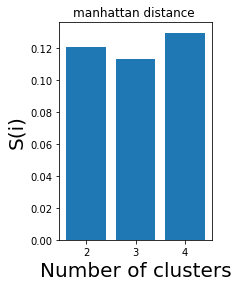

In [ ]:
k = [2, 3, 4]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
for i in range(len(k)):
  complete = AgglomerativeClustering(n_clusters= k[i], linkage= 'complete')
  silhouette_scores.append(silhouette_score(data_std, complete.fit_predict(data_std)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)
plt.title('euclidean distance')
plt.show()

silhouette_scores = []
for i in range(len(k)):
  complete = AgglomerativeClustering(n_clusters= k[i], linkage= 'complete', affinity= "manhattan")
  silhouette_scores.append(silhouette_score(data_std, complete.fit_predict(data_std)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)
plt.title('manhattan distance')
plt.show()


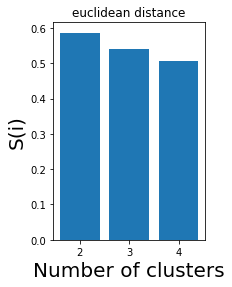

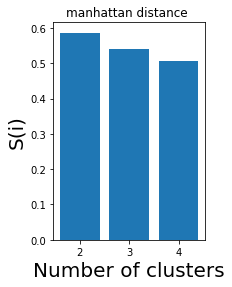

In [ ]:
plt.subplot(1,2,1)

k = [2, 3, 4]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
for i in range(len(k)):
  avg = AgglomerativeClustering(n_clusters= k[i], linkage= 'average')
  silhouette_scores.append(silhouette_score(data_std, avg.fit_predict(data_std)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)
plt.title('euclidean distance')
plt.show()


plt.subplot(1,2,2)
silhouette_scores = []
for i in range(len(k)):
  avg = AgglomerativeClustering(n_clusters= k[i], linkage= 'average', affinity= 'manhattan')
  silhouette_scores.append(silhouette_score(data_std, avg.fit_predict(data_std)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)
plt.title('manhattan distance ')
plt.show()


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [ ]:
cov = np.cov(data_std.T)

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen values ", eig_val, "\n")

Eigen values  [4.27879026 2.15785352 1.75720967 1.41326207 1.31046019 1.16385673
 1.07181705 0.11811408 0.24864653 0.24318741 0.32100369 0.85419556
 0.39208208 0.78573016 0.73093561 0.66095072 0.46643023 0.52638669
 0.58664536] 



In [ ]:
sorted(eig_val, reverse= True)

In [ ]:
sum_eig_val = np.sum(eig_val)

In [ ]:

sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.22416646 0.11305027 0.09206048 0.07404101 0.06865521 0.06097463
 0.05615266 0.00618801 0.01302663 0.01274062 0.01681743 0.04475143
 0.02054124 0.04116452 0.03829383 0.03462731 0.02443635 0.02757748
 0.03073444]
[0.22416646 0.33721673 0.42927721 0.50331822 0.57197343 0.63294805
 0.68910071 0.69528872 0.70831535 0.72105598 0.73787341 0.78262484
 0.80316608 0.8443306  0.88262443 0.91725173 0.94168808 0.96926556
 1.        ]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components= 7)

In [ ]:
principalComponents = pca.fit_transform(data_std)

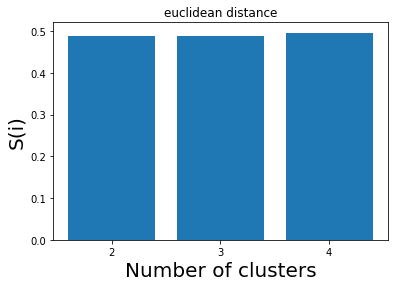

In [ ]:
k = [2, 3, 4]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
for i in range(len(k)):
  complete = AgglomerativeClustering(n_clusters= k[i], linkage= 'complete')
  silhouette_scores.append(silhouette_score(principalComponents, complete.fit_predict(principalComponents)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)
plt.title('euclidean distance')
plt.show()

In [ ]:
pca = PCA(n_components= 10)
principalComponents = pca.fit_transform(data_std)

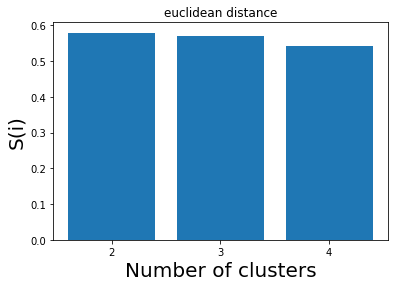

In [ ]:
k = [2, 3, 4]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
for i in range(len(k)):
  complete = AgglomerativeClustering(n_clusters= k[i], linkage= 'complete')
  silhouette_scores.append(silhouette_score(principalComponents, complete.fit_predict(principalComponents)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.xticks(k)
plt.title('euclidean distance')
plt.show()